# #DuBoisChallenge2024 Challenge 07

Alright, it's time for a Du Bois chart again. This time, I'll focus on how to make the code reusable.

We'll work through it in three steps:

1. Load the data
2. Test visualisation
3. Final visualisation (reusable)

But first, we load the required packages:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from colors import dubois_colors
%matplotlib notebook

## 1. Load the data

We first load the challenge data using pandas. 

I split up the data manually to load it as two dataframes:

In [5]:
df1860 = pd.read_csv('2024/challenge08/data - 1860.csv')
df1860.head(5)

,Year,Slave,Free
0,1860,89,11


That looks okay. Let's load the other data.

In [4]:
df1890 = pd.read_csv('2024/challenge08/data - 1890.csv')
df1890.head(5)

,Year,Owners,Tenants
0,1890,19,81


And as the data is so small, I'll put it in two list to make it easier to use later on:

In [153]:
y1 = [df1860['Slave'][0], df1860['Free'][0]]
y2 = [df1890['Tenants'][0], df1890['Owners'][0]]

y1_labels = ['SLAVES\nESCLAVES', 'FREE LABORERS\nOUVRIERS LIBRE']
y2_labels = ['TENANTS\nMÉTAYERS', 'PEASANT PROPRIETORS\nPAYSANS PROPRIETAIRES']

year_labels = [1860, 1890]

y1,y2

([89, 11], [81, 19])

The original design also shows a larger right bar (10cm) than the left bar (6cm). There are two ways to make this work. One is to make two subplots. The other is to create a list the 'projected' data. I choose the latter options:

In [50]:
y2_projected = []

for value in y2:
    y2_projected.append(value * (10/6))
    
y2_projected

[135.0, 31.666666666666668]

## 2. Test visualisation

The code below shows you how you can plot the data. The `bottom` parameter allows you to set a starting point for the data. Using it, we can make stacked bar charts and make the second one float.

<IPython.core.display.Javascript object>


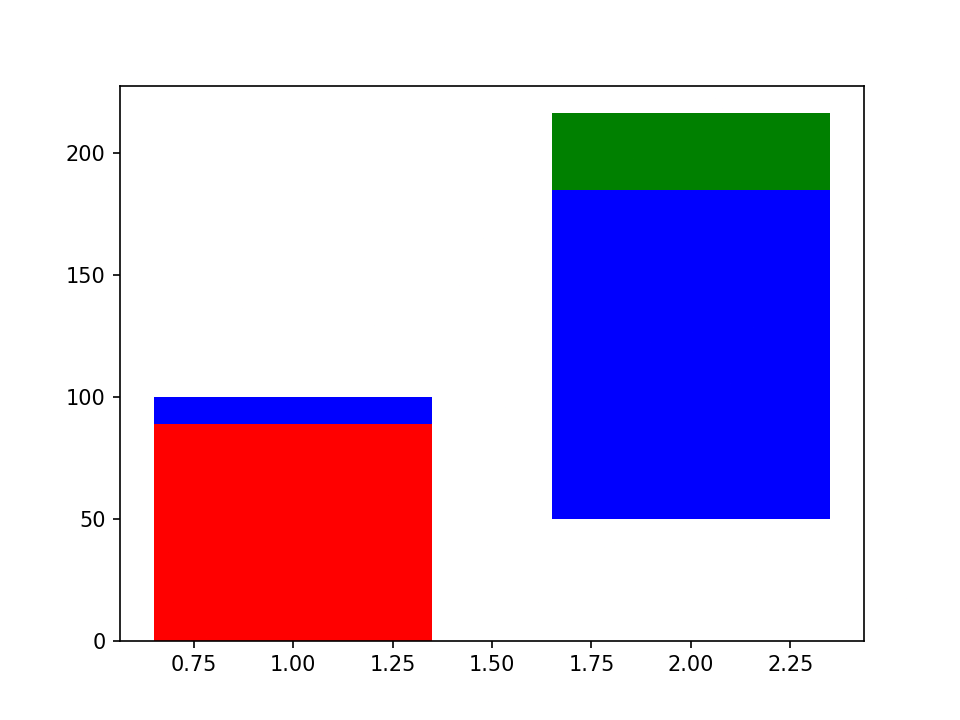

<BarContainer object of 2 artists>

In [52]:
fig, ax = plt.subplots()

bar_width = .7
ax.bar(
    1,
    y1,
    bottom=[0, y1[0]],
    color=['red', 'blue'],
    width=bar_width
)

ax.bar(
    2,
    y2_projected,
    bottom=[50, y2_projected[0]+50],
    color=['blue', 'green'],
    width=bar_width,
)

The visualisation also has a few lines that go from the left blue part to the right one. Let's add those as line charts. As a test, I want to draw a hoirzontal line from the left bar to the right bar. Because I used the `bar_width` variable for the `width` parameter, I use that to calculate the start and end point of the test line:

<IPython.core.display.Javascript object>


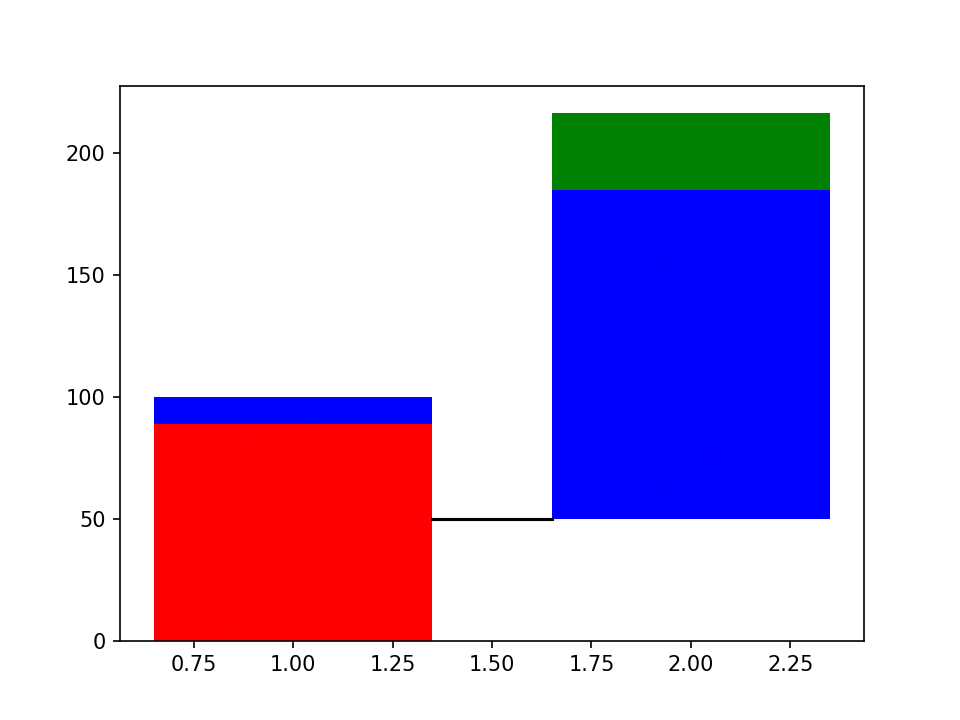

In [54]:
fig, ax = plt.subplots()

bar_width = .7
ax.bar(
    1,
    y1,
    bottom=[0, y1[0]],
    color=['red', 'blue'],
    width=bar_width
)

bottom_margin = 50
ax.bar(
    2,
    y2_projected,
    bottom=[bottom_margin, y2_projected[0]+bottom_margin],
    color=['blue', 'green'],
    width=bar_width,
)

bar_margin = bar_width/2
ax.plot(
    [1+bar_margin, 2-bar_margin],
    [50, 50],
    color='black',
)

Now that works, let's add five lines based on the data. 

<IPython.core.display.Javascript object>


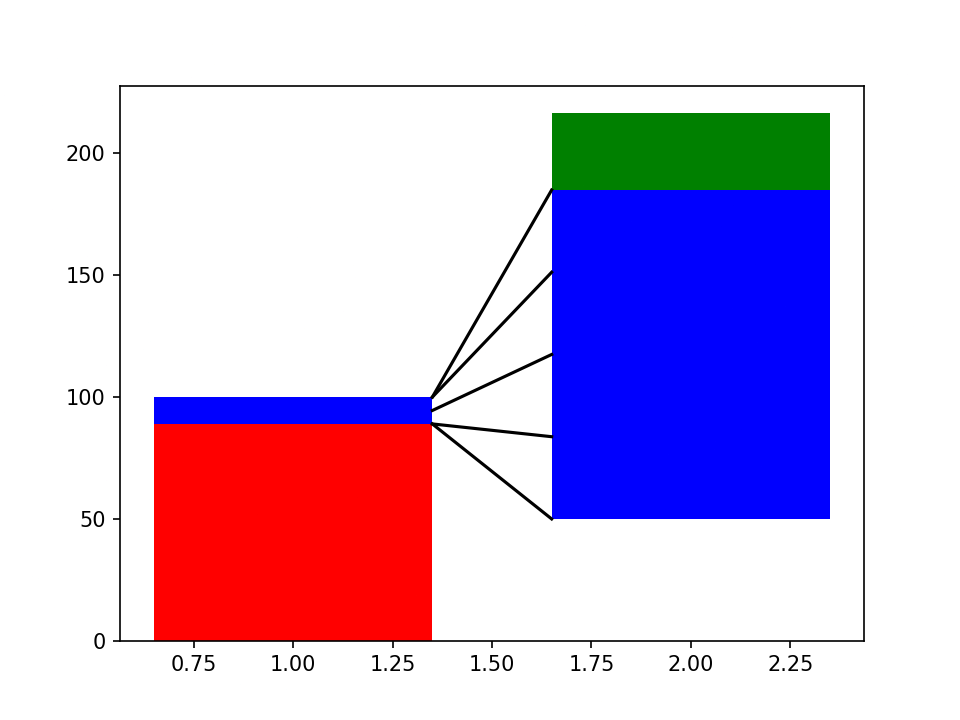

In [62]:
fig, ax = plt.subplots()

bar_width = .7
ax.bar(
    1,
    y1,
    bottom=[0, y1[0]],
    color=['red', 'blue'],
    width=bar_width
)
 
bottom_margin = 50
ax.bar(
    2,
    y2_projected,
    bottom=[bottom_margin, y2_projected[0]+bottom_margin],
    color=['blue', 'green'],
    width=bar_width,
)

# for loop here
bar_margin = bar_width/2
n_lines = 5
for index in range(0,n_lines):

    y_start = y1[0]
    
    if index == 2:
        y_start = y1[0] + (y1[1] / 2)
    elif index in [3,4]:
        y_start = y1[0] + y1[1]
    
    y_end_bottom = bottom_margin
    y_end = y_end_bottom + (y2_projected[0] / (n_lines - 1) * index)
        
    ax.plot(
        [1+bar_margin, 2-bar_margin],
        [y_start, y_end],
        color='black',
    )

Alright, lets Du Bois-ify this dataviz.

## 3. Final visaulisation

Let's start by changing the layout (`figsize`), adding the `dubois_colors`, and positioning the plot.

<IPython.core.display.Javascript object>


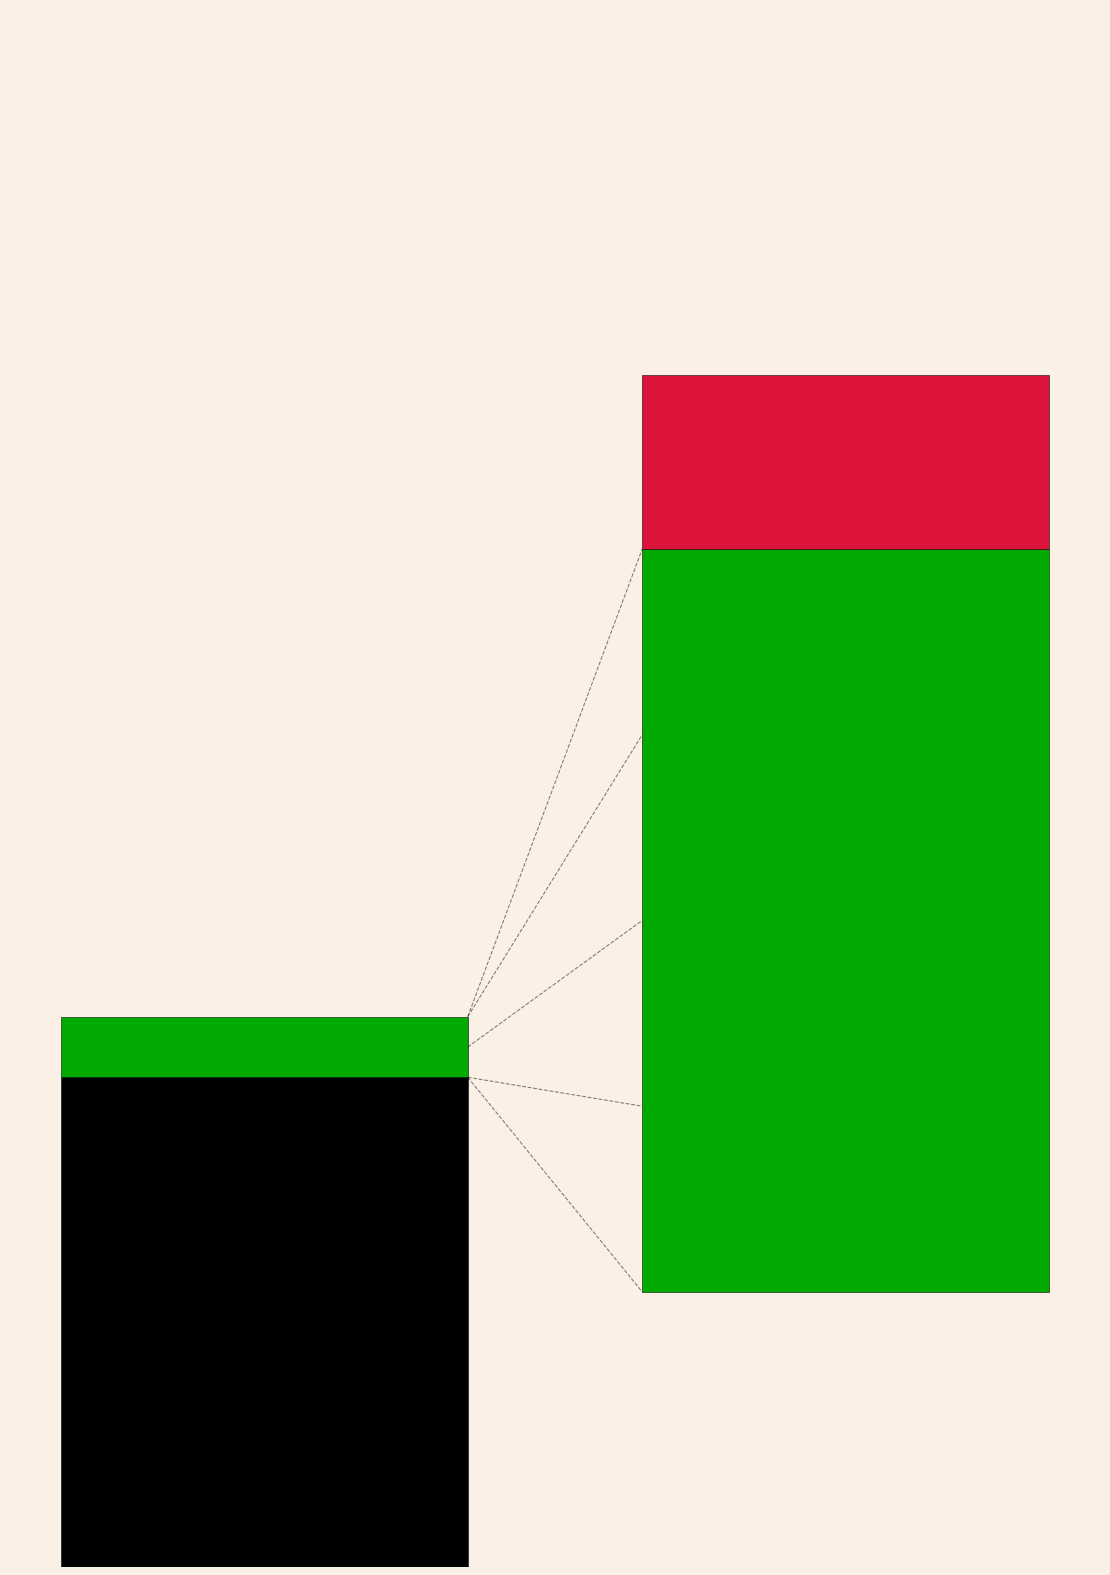

In [176]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

bar_width = .7
ax.bar(
    1,
    y1,
    bottom=[0, y1[0]],
    color=[dubois_colors.get('black'), dubois_colors.get('green')],
    width=bar_width,
    edgecolor=dubois_colors.get('black'),
    lw=.25,
)
 
bottom_margin = 50
ax.bar(
    2,
    y2_projected,
    bottom=[bottom_margin, y2_projected[0]+bottom_margin],
    color=[dubois_colors.get('green'), dubois_colors.get('crimson')],
    width=bar_width,
    edgecolor=dubois_colors.get('black'),
    lw=.25,
)

bar_margin = bar_width/2
n_lines = 5
for index in range(0,n_lines):

    y_start = y1[0]
    if index == 2:
        y_start = y1[0] + (y1[1] / 2)
    elif index in [3,4]:
        y_start = y1[0] + y1[1]
    
    y_end_bottom = bottom_margin
    y_end = y_end_bottom + (y2_projected[0] / (n_lines - 1) * index)
        
    ax.plot(
        [1+bar_margin, 2-bar_margin],
        [y_start, y_end],
        color='black',
        lw='.5',
        linestyle='--',
        alpha=.5
    )

ax.axis('off')
plt.subplots_adjust(left=.01, right=.99, bottom=0.005, top=.8)

We can now add the data labels. This takes some tweaks, as the orignal has one alternat label colour (crimson on black) and one alternate alignment (left instead of center). 

<IPython.core.display.Javascript object>


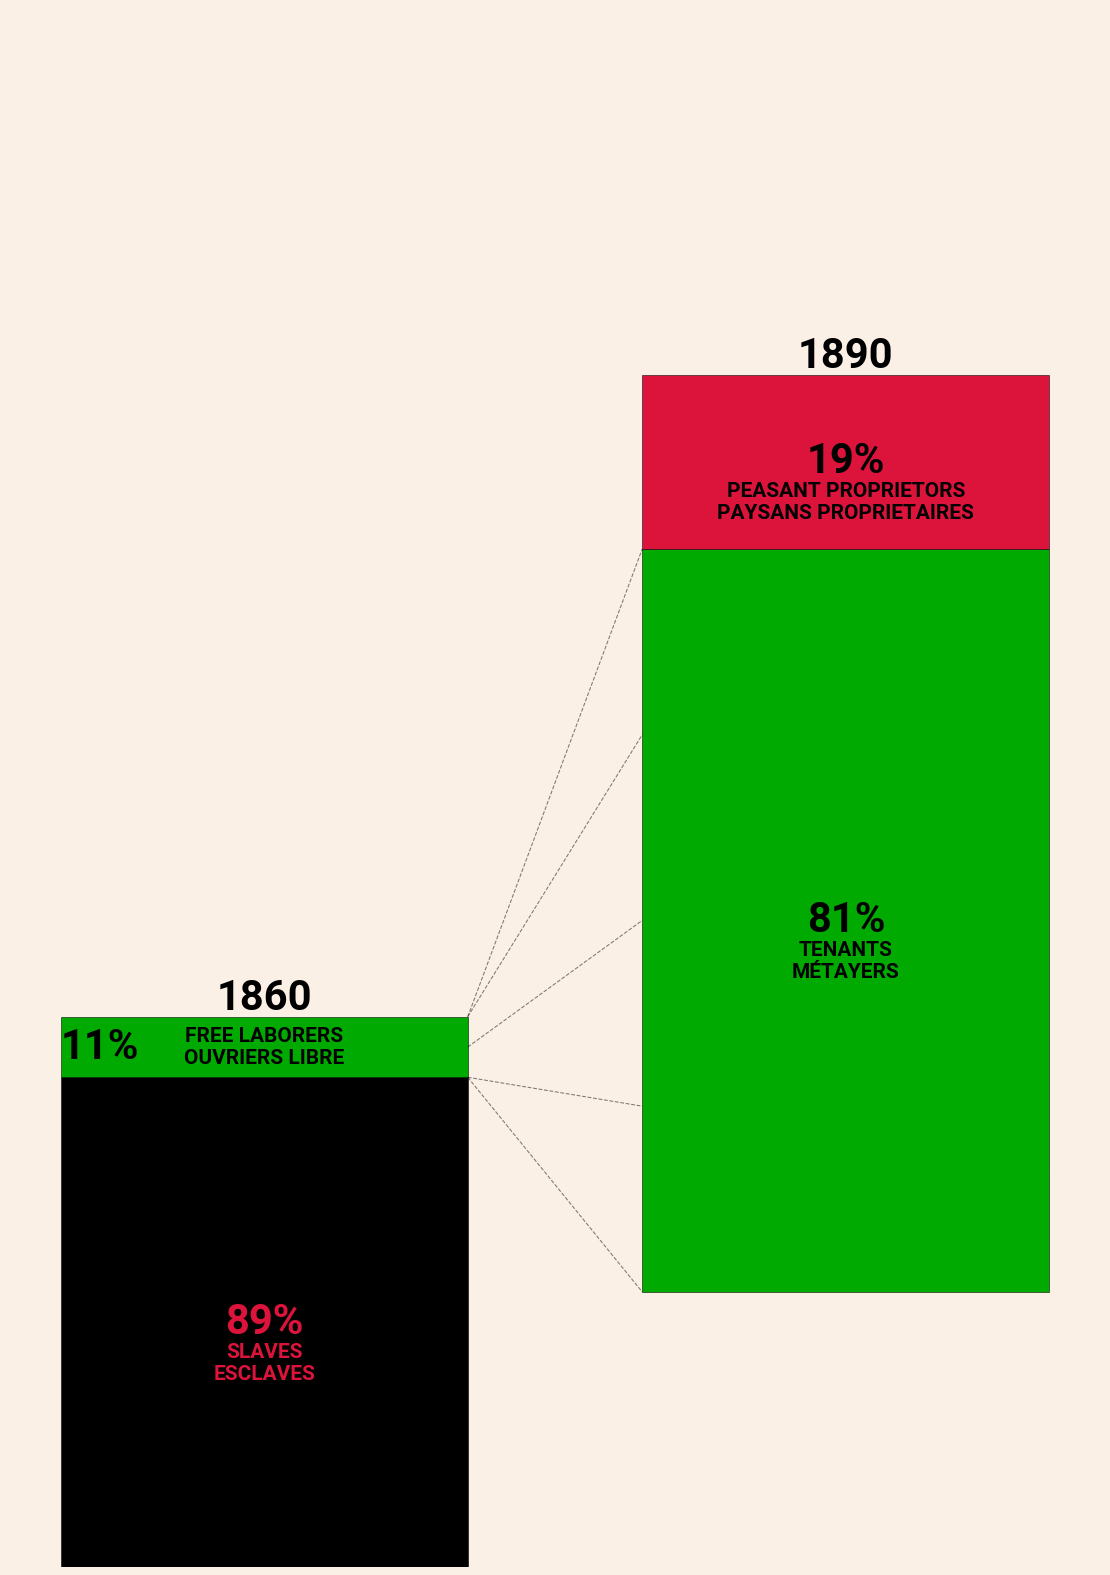

In [177]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

bar_width = .7
ax.bar(
    1,
    y1,
    bottom=[0, y1[0]],
    color=[dubois_colors.get('black'), dubois_colors.get('green')],
    width=bar_width,
    edgecolor=dubois_colors.get('black'),
    lw=.25,
)
 
bottom_margin = 50
ax.bar(
    2,
    y2_projected,
    bottom=[bottom_margin, y2_projected[0]+bottom_margin],
    color=[dubois_colors.get('green'), dubois_colors.get('crimson')],
    width=bar_width,
    edgecolor=dubois_colors.get('black'),
    lw=.25,
)

bar_margin = bar_width/2
n_lines = 5
for index in range(0,n_lines):

    y_start = y1[0]
    if index == 2:
        y_start = y1[0] + (y1[1] / 2)
    elif index in [3,4]:
        y_start = y1[0] + y1[1]
    
    y_end_bottom = bottom_margin
    y_end = y_end_bottom + (y2_projected[0] / (n_lines - 1) * index)
        
    ax.plot(
        [1+bar_margin, 2-bar_margin],
        [y_start, y_end],
        color='black',
        lw='.5',
        linestyle='--',
        alpha=.5
    )

ax.axis('off')
plt.subplots_adjust(left=.01, right=.99, bottom=0.005, top=.8)

data_settings = {
    'fontweight': 'bold',
    'fontfamily': 'Roboto',
    'fontsize': 20
}

data_label_settings = {
    'fontweight': 'bold',
    'fontfamily': 'Roboto',
    'fontsize': 10,
    'ha': 'center',
    'va': 'center',
}

# add labels with modifications

y_text = 0
max_y = max(y1 + y2_projected)

# using zip, we can combine the two lists in a single loop
for value in zip(y1, y1_labels):
    y_text += value[0]
    
    color = dubois_colors.get('black')
    ha = 'center'
    x_correction = 0
    y_correction = 0
    
    if value[0] == y1[0]:
        color = dubois_colors.get('crimson')
        y_correction = - .055*max_y
        
    if value[0] == y1[1]:
        ha = 'left'
        x_correction = - (bar_width/2)
        
    ax.text(
        x=1+x_correction,
        y=y_text - value[0] / 2,
        s=f'{str(value[0])}%',
        ha=ha,
        va='center',
        color=color,
        **data_settings
    )
    
    ax.text(
        x=1,
        y=y_text - value[0] / 2 + y_correction,
        s=f'{str(value[1])}',
        color=color,
        **data_label_settings
    )

y_text = bottom_margin
for value in zip(y2, y2_projected, y2_labels):
    y_text += value[1]

    ax.text(
        x=2,
        y=y_text - value[1] / 2,
        s=f'{str(value[0])}%',
        ha='center',
        va='center',
        color=color,
        **data_settings
    )
    
    ax.text(
        x=2,
        y=y_text - value[1] / 2 - (.055*max_y),
        s=f'{str(value[2])}',
        color=color,
        **data_label_settings
    )
    
# year labels
for index, label in enumerate(year_labels):
    x_label = index + 1
    y_label = sum(y1)
    
    if index == 1:
        y_label = sum(y2_projected) + bottom_margin
    
    y_label += max_y*.025
    
    ax.text(
        x=x_label,
        y=y_label,
        s=str(label),
        ha='center',
        va='center',
        **data_settings
    )
    

And now we can add the plot labels. First we add the main titles:

<IPython.core.display.Javascript object>


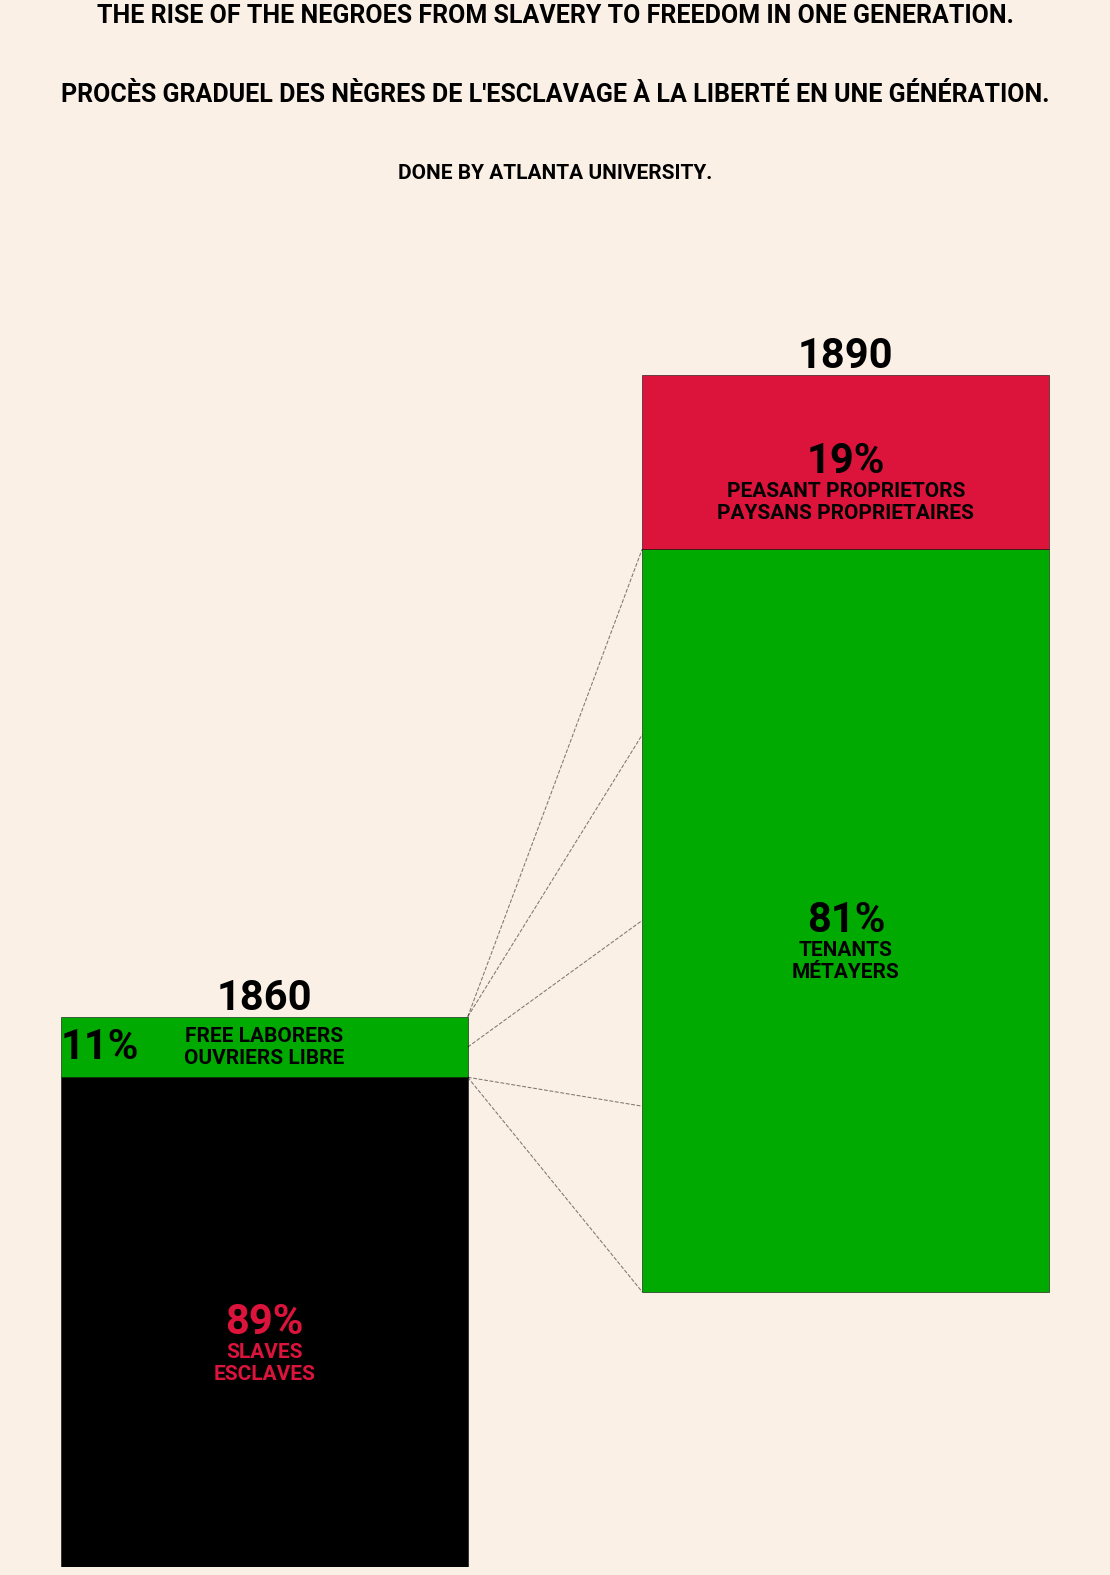

Text(0.5, 0.89, 'DONE BY ATLANTA UNIVERSITY.')

In [178]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

bar_width = .7
ax.bar(
    1,
    y1,
    bottom=[0, y1[0]],
    color=[dubois_colors.get('black'), dubois_colors.get('green')],
    width=bar_width,
    edgecolor=dubois_colors.get('black'),
    lw=.25,
)
 
bottom_margin = 50
ax.bar(
    2,
    y2_projected,
    bottom=[bottom_margin, y2_projected[0]+bottom_margin],
    color=[dubois_colors.get('green'), dubois_colors.get('crimson')],
    width=bar_width,
    edgecolor=dubois_colors.get('black'),
    lw=.25,
)

bar_margin = bar_width/2
n_lines = 5
for index in range(0,n_lines):

    y_start = y1[0]
    if index == 2:
        y_start = y1[0] + (y1[1] / 2)
    elif index in [3,4]:
        y_start = y1[0] + y1[1]
    
    y_end_bottom = bottom_margin
    y_end = y_end_bottom + (y2_projected[0] / (n_lines - 1) * index)
        
    ax.plot(
        [1+bar_margin, 2-bar_margin],
        [y_start, y_end],
        color='black',
        lw='.5',
        linestyle='--',
        alpha=.5
    )

ax.axis('off')
plt.subplots_adjust(left=.01, right=.99, bottom=0.005, top=.8)

data_settings = {
    'fontweight': 'bold',
    'fontfamily': 'Roboto',
    'fontsize': 20
}

data_label_settings = {
    'fontweight': 'bold',
    'fontfamily': 'Roboto',
    'fontsize': 10,
    'ha': 'center',
    'va': 'center',
}

y_text = 0
max_y = max(y1 + y2_projected)

for value in zip(y1, y1_labels):
    y_text += value[0]
    
    color = dubois_colors.get('black')
    ha = 'center'
    x_correction = 0
    y_correction = 0
    
    if value[0] == y1[0]:
        color = dubois_colors.get('crimson')
        y_correction = - .055*max_y
        
    if value[0] == y1[1]:
        ha = 'left'
        x_correction = - (bar_width/2)
        
    ax.text(
        x=1+x_correction,
        y=y_text - value[0] / 2,
        s=f'{str(value[0])}%',
        ha=ha,
        va='center',
        color=color,
        **data_settings
    )
    
    ax.text(
        x=1,
        y=y_text - value[0] / 2 + y_correction,
        s=f'{str(value[1])}',
        color=color,
        **data_label_settings
    )

y_text = bottom_margin
for value in zip(y2, y2_projected, y2_labels):
    y_text += value[1]

    ax.text(
        x=2,
        y=y_text - value[1] / 2,
        s=f'{str(value[0])}%',
        ha='center',
        va='center',
        color=color,
        **data_settings
    )
    
    ax.text(
        x=2,
        y=y_text - value[1] / 2 - (.055*max_y),
        s=f'{str(value[2])}',
        color=color,
        **data_label_settings
    )
    
for index, label in enumerate(year_labels):
    x_label = index + 1
    y_label = sum(y1)
    
    if index == 1:
        y_label = sum(y2_projected) + bottom_margin
    
    y_label += max_y*.025
    
    ax.text(
        x=x_label,
        y=y_label,
        s=str(label),
        ha='center',
        va='center',
        **data_settings
    )
    

# add plot labels
plot_labels_settings = {
    'fontweight': 'bold',
    'fontfamily': 'Roboto',
    'fontsize': 12,
    'va': 'center',
    'ha': 'center',
    'x': .5,
    'transform': fig.transFigure
}

plt.text(
    y=.99,
    s='THE RISE OF THE NEGROES FROM SLAVERY TO FREEDOM IN ONE GENERATION.',
    **plot_labels_settings,
)

plt.text(
    y=.94,
    s='PROCÈS GRADUEL DES NÈGRES DE L\'ESCLAVAGE À LA LIBERTÉ EN UNE GÉNÉRATION.',
    **plot_labels_settings,
)

plot_labels_settings['fontsize'] = 10
plt.text(
    y=.89,
    s='DONE BY ATLANTA UNIVERSITY.',
    **plot_labels_settings,
)
    


We then add lighter sub labels for context. Note that one of the sublabels has rounde data in it! (90%)

<IPython.core.display.Javascript object>


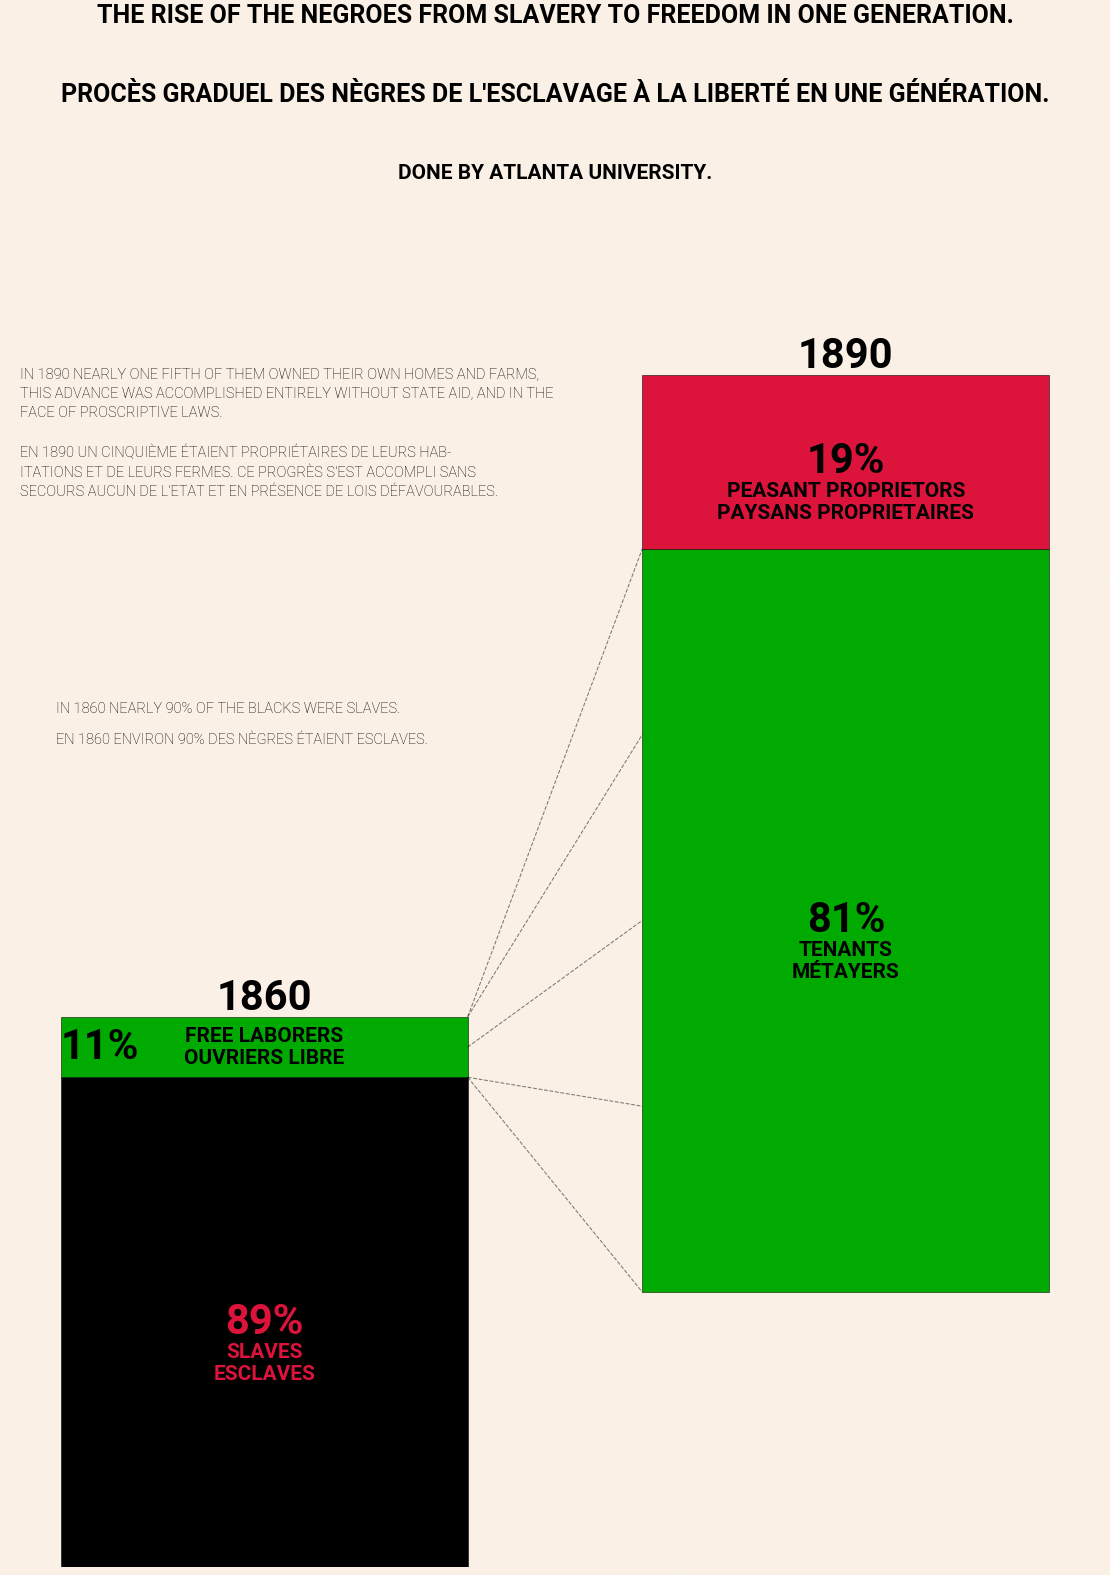

Text(0.05, 0.53, 'EN 1860 ENVIRON 90% DES NÈGRES ÉTAIENT ESCLAVES.')

In [179]:
fig, ax = plt.subplots(
    figsize=(7.4,10.5), 
    facecolor=dubois_colors['bg']
)

bar_width = .7
ax.bar(
    1,
    y1,
    bottom=[0, y1[0]],
    color=[dubois_colors.get('black'), dubois_colors.get('green')],
    width=bar_width,
    edgecolor=dubois_colors.get('black'),
    lw=.25,
)
 
bottom_margin = 50
ax.bar(
    2,
    y2_projected,
    bottom=[bottom_margin, y2_projected[0]+bottom_margin],
    color=[dubois_colors.get('green'), dubois_colors.get('crimson')],
    width=bar_width,
    edgecolor=dubois_colors.get('black'),
    lw=.25,
)

bar_margin = bar_width/2
n_lines = 5
for index in range(0,n_lines):

    y_start = y1[0]
    if index == 2:
        y_start = y1[0] + (y1[1] / 2)
    elif index in [3,4]:
        y_start = y1[0] + y1[1]
    
    y_end_bottom = bottom_margin
    y_end = y_end_bottom + (y2_projected[0] / (n_lines - 1) * index)
        
    ax.plot(
        [1+bar_margin, 2-bar_margin],
        [y_start, y_end],
        color='black',
        lw='.5',
        linestyle='--',
        alpha=.5
    )

ax.axis('off')
plt.subplots_adjust(left=.01, right=.99, bottom=0.005, top=.8)

data_settings = {
    'fontweight': 'bold',
    'fontfamily': 'Roboto',
    'fontsize': 20
}

data_label_settings = {
    'fontweight': 'bold',
    'fontfamily': 'Roboto',
    'fontsize': 10,
    'ha': 'center',
    'va': 'center',
}

y_text = 0
max_y = max(y1 + y2_projected)

for value in zip(y1, y1_labels):
    y_text += value[0]
    
    color = dubois_colors.get('black')
    ha = 'center'
    x_correction = 0
    y_correction = 0
    
    if value[0] == y1[0]:
        color = dubois_colors.get('crimson')
        y_correction = - .055*max_y
        
    if value[0] == y1[1]:
        ha = 'left'
        x_correction = - (bar_width/2)
        
    ax.text(
        x=1+x_correction,
        y=y_text - value[0] / 2,
        s=f'{str(value[0])}%',
        ha=ha,
        va='center',
        color=color,
        **data_settings
    )
    
    ax.text(
        x=1,
        y=y_text - value[0] / 2 + y_correction,
        s=f'{str(value[1])}',
        color=color,
        **data_label_settings
    )

y_text = bottom_margin
for value in zip(y2, y2_projected, y2_labels):
    y_text += value[1]

    ax.text(
        x=2,
        y=y_text - value[1] / 2,
        s=f'{str(value[0])}%',
        ha='center',
        va='center',
        color=color,
        **data_settings
    )
    
    ax.text(
        x=2,
        y=y_text - value[1] / 2 - (.055*max_y),
        s=f'{str(value[2])}',
        color=color,
        **data_label_settings
    )
    
for index, label in enumerate(year_labels):
    x_label = index + 1
    y_label = sum(y1)
    
    if index == 1:
        y_label = sum(y2_projected) + bottom_margin
    
    y_label += max_y*.025
    
    ax.text(
        x=x_label,
        y=y_label,
        s=str(label),
        ha='center',
        va='center',
        **data_settings
    )
    

plot_labels_settings = {
    'fontweight': 'bold',
    'fontfamily': 'Roboto',
    'fontsize': 12,
    'va': 'center',
    'ha': 'center',
    'x': .5,
    'transform': fig.transFigure
}

plt.text(
    y=.99,
    s='THE RISE OF THE NEGROES FROM SLAVERY TO FREEDOM IN ONE GENERATION.',
    **plot_labels_settings,
)

plt.text(
    y=.94,
    s='PROCÈS GRADUEL DES NÈGRES DE L\'ESCLAVAGE À LA LIBERTÉ EN UNE GÉNÉRATION.',
    **plot_labels_settings,
)

plot_labels_settings['fontsize'] = 10
plt.text(
    y=.89,
    s='DONE BY ATLANTA UNIVERSITY.',
    **plot_labels_settings,
)
    
# add plot sub labels
plot_sublabels_settings = {
    'fontweight': 'light',
    'fontfamily': 'Roboto',
    'fontsize': 7,
    'va': 'center',
    'ha': 'left',
    'x': .005,
    'linespacing': .6,
    'transform': fig.transFigure
}

plt.text(
    y=.75,
    s=f'''
    IN {str(year_labels[1])} NEARLY ONE FIFTH OF THEM OWNED THEIR OWN HOMES AND FARMS,\n
    THIS ADVANCE WAS ACCOMPLISHED ENTIRELY WITHOUT STATE AID, AND IN THE\n
    FACE OF PROSCRIPTIVE LAWS.
    ''',
    **plot_sublabels_settings
)

plt.text(
    y=.70,
    s=f'''
    EN {str(year_labels[1])} UN CINQUIÈME ÉTAIENT PROPRIÉTAIRES DE LEURS HAB-\n
    ITATIONS ET DE LEURS FERMES. CE PROGRÈS S'EST ACCOMPLI SANS\n
    SECOURS AUCUN DE L'ETAT ET EN PRÉSENCE DE LOIS DÉFAVOURABLES.
    ''',
    **plot_sublabels_settings
)

plot_sublabels_settings['x'] = .05
plt.text(
    y=.55,
    s=f'IN {str(year_labels[0])} NEARLY {str(round(y1[0]/10)*10)}% OF THE BLACKS WERE SLAVES.',
    **plot_sublabels_settings
)
plt.text(
    y=.53,
    s=f'EN {str(year_labels[0])} ENVIRON {str(round(y1[0]/10)*10)}% DES NÈGRES ÉTAIENT ESCLAVES.',
    **plot_sublabels_settings
)

Now let's make this a bit reusable. I'm going to wrap the code in a function and make the input variable. That should change the years and numbers when other data is passed.

Let's have a look:

In [181]:
def plot_data(y1, y2, y2_projected, year_labels):
    fig, ax = plt.subplots(
        figsize=(7.4,10.5), 
        facecolor=dubois_colors['bg']
    )

    bar_width = .7
    ax.bar(
        1,
        y1,
        bottom=[0, y1[0]],
        color=[dubois_colors.get('black'), dubois_colors.get('green')],
        width=bar_width,
        edgecolor=dubois_colors.get('black'),
        lw=.25,
    )

    bottom_margin = 50
    ax.bar(
        2,
        y2_projected,
        bottom=[bottom_margin, y2_projected[0]+bottom_margin],
        color=[dubois_colors.get('green'), dubois_colors.get('crimson')],
        width=bar_width,
        edgecolor=dubois_colors.get('black'),
        lw=.25,
    )

    bar_margin = bar_width/2
    n_lines = 5
    for index in range(0,n_lines):

        y_start = y1[0]
        if index == 2:
            y_start = y1[0] + (y1[1] / 2)
        elif index in [3,4]:
            y_start = y1[0] + y1[1]

        y_end_bottom = bottom_margin
        y_end = y_end_bottom + (y2_projected[0] / (n_lines - 1) * index)

        ax.plot(
            [1+bar_margin, 2-bar_margin],
            [y_start, y_end],
            color='black',
            lw='.5',
            linestyle='--',
            alpha=.5
        )

    ax.axis('off')
    plt.subplots_adjust(left=.01, right=.99, bottom=0.005, top=.8)

    data_settings = {
        'fontweight': 'bold',
        'fontfamily': 'Roboto',
        'fontsize': 20
    }

    data_label_settings = {
        'fontweight': 'bold',
        'fontfamily': 'Roboto',
        'fontsize': 10,
        'ha': 'center',
        'va': 'center',
    }

    y_text = 0
    max_y = max(y1 + y2_projected)

    for value in zip(y1, y1_labels):
        y_text += value[0]

        color = dubois_colors.get('black')
        ha = 'center'
        x_correction = 0
        y_correction = 0

        if value[0] == y1[0]:
            color = dubois_colors.get('crimson')
            y_correction = - .055*max_y

        if value[0] == y1[1]:
            ha = 'left'
            x_correction = - (bar_width/2)

        ax.text(
            x=1+x_correction,
            y=y_text - value[0] / 2,
            s=f'{str(value[0])}%',
            ha=ha,
            va='center',
            color=color,
            **data_settings
        )

        ax.text(
            x=1,
            y=y_text - value[0] / 2 + y_correction,
            s=f'{str(value[1])}',
            color=color,
            **data_label_settings
        )

    y_text = bottom_margin
    for value in zip(y2, y2_projected, y2_labels):
        y_text += value[1]

        ax.text(
            x=2,
            y=y_text - value[1] / 2,
            s=f'{str(value[0])}%',
            ha='center',
            va='center',
            color=color,
            **data_settings
        )

        ax.text(
            x=2,
            y=y_text - value[1] / 2 - (.055*max_y),
            s=f'{str(value[2])}',
            color=color,
            **data_label_settings
        )

    for index, label in enumerate(year_labels):
        x_label = index + 1
        y_label = sum(y1)

        if index == 1:
            y_label = sum(y2_projected) + bottom_margin

        y_label += max_y*.025

        ax.text(
            x=x_label,
            y=y_label,
            s=str(label),
            ha='center',
            va='center',
            **data_settings
        )


    plot_labels_settings = {
        'fontweight': 'bold',
        'fontfamily': 'Roboto',
        'fontsize': 12,
        'va': 'center',
        'ha': 'center',
        'x': .5,
        'transform': fig.transFigure
    }

    plt.text(
        y=.99,
        s='THE RISE OF THE NEGROES FROM SLAVERY TO FREEDOM IN ONE GENERATION.',
        **plot_labels_settings,
    )

    plt.text(
        y=.94,
        s='PROCÈS GRADUEL DES NÈGRES DE L\'ESCLAVAGE À LA LIBERTÉ EN UNE GÉNÉRATION.',
        **plot_labels_settings,
    )

    plot_labels_settings['fontsize'] = 10
    plt.text(
        y=.89,
        s='DONE BY ATLANTA UNIVERSITY.',
        **plot_labels_settings,
    )

    # add plot sub labels
    plot_sublabels_settings = {
        'fontweight': 'light',
        'fontfamily': 'Roboto',
        'fontsize': 7,
        'va': 'center',
        'ha': 'left',
        'x': .005,
        'linespacing': .6,
        'transform': fig.transFigure
    }

    plt.text(
        y=.75,
        s=f'''
        IN {str(year_labels[1])} NEARLY ONE FIFTH OF THEM OWNED THEIR OWN HOMES AND FARMS,\n
        THIS ADVANCE WAS ACCOMPLISHED ENTIRELY WITHOUT STATE AID, AND IN THE\n
        FACE OF PROSCRIPTIVE LAWS.
        ''',
        **plot_sublabels_settings
    )

    plt.text(
        y=.70,
        s=f'''
        EN {str(year_labels[1])} UN CINQUIÈME ÉTAIENT PROPRIÉTAIRES DE LEURS HAB-\n
        ITATIONS ET DE LEURS FERMES. CE PROGRÈS S'EST ACCOMPLI SANS\n
        SECOURS AUCUN DE L'ETAT ET EN PRÉSENCE DE LOIS DÉFAVOURABLES.
        ''',
        **plot_sublabels_settings
    )

    plot_sublabels_settings['x'] = .05
    plt.text(
        y=.55,
        s=f'IN {str(year_labels[0])} NEARLY {str(round(y1[0]/10)*10)}% OF THE BLACKS WERE SLAVES.',
        **plot_sublabels_settings
    )
    plt.text(
        y=.53,
        s=f'EN {str(year_labels[0])} ENVIRON {str(round(y1[0]/10)*10)}% DES NÈGRES ÉTAIENT ESCLAVES.',
        **plot_sublabels_settings
    )

Alright. That's it!

<IPython.core.display.Javascript object>


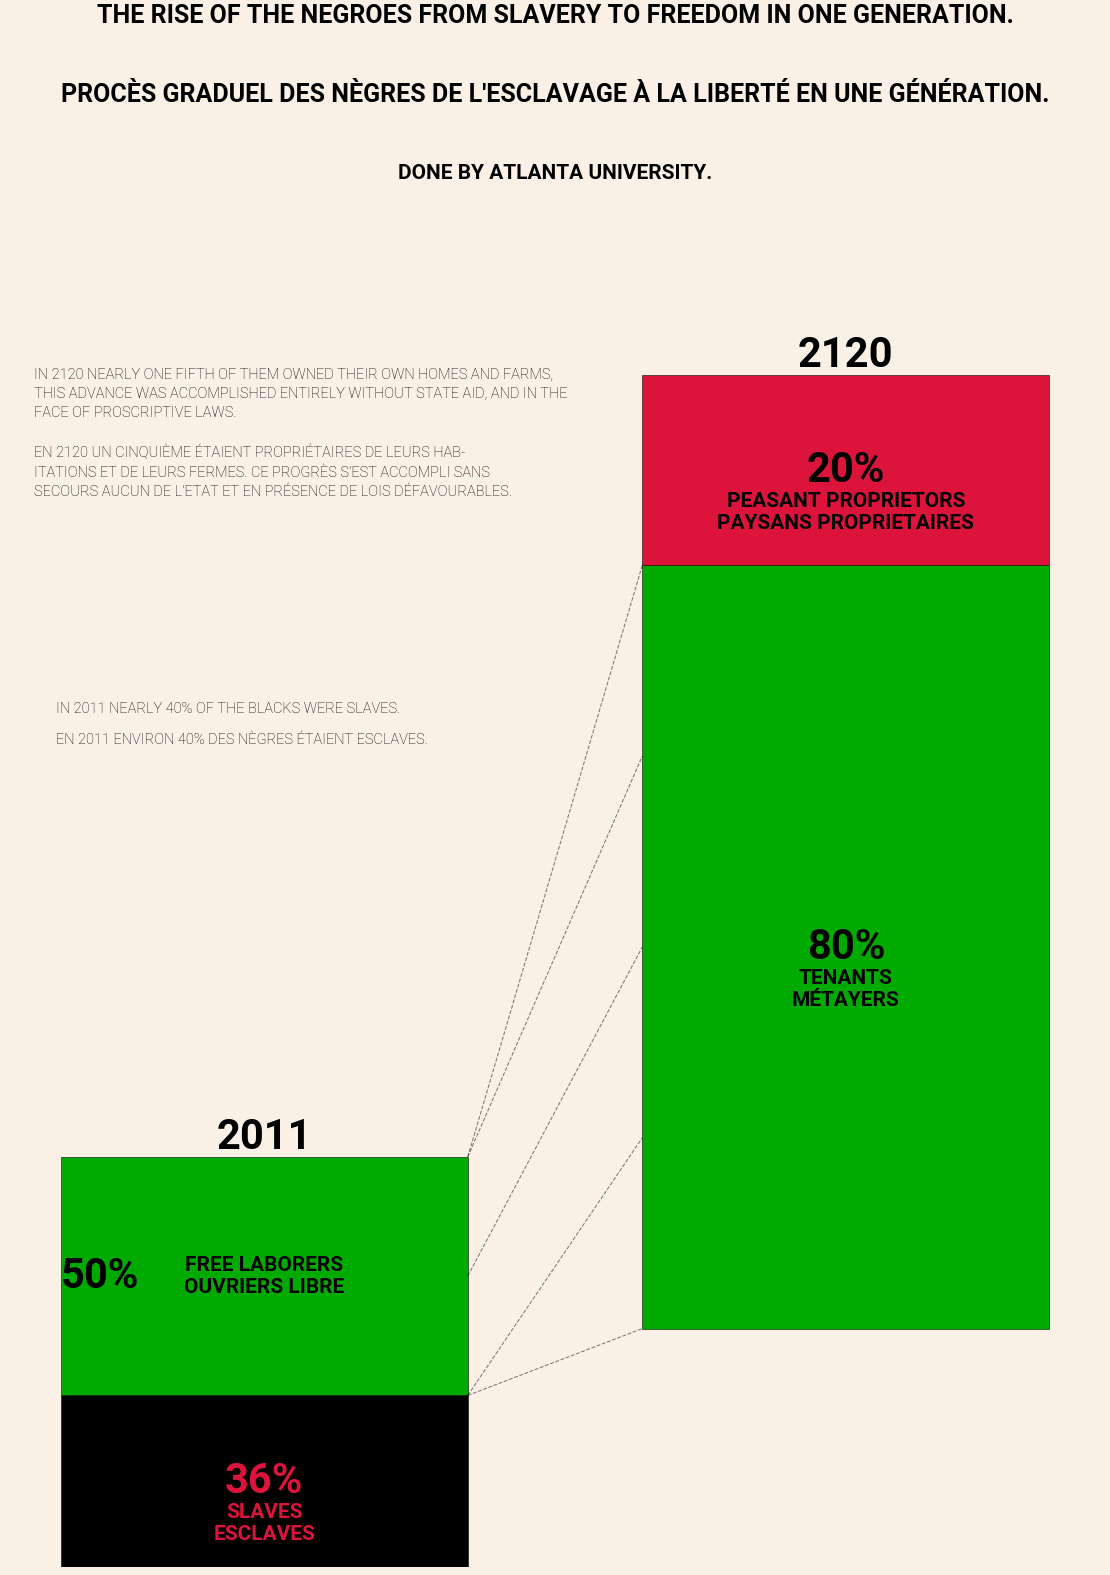

In [182]:
plot_data(
    y1=[36,50],
    y2=[80,20],
    y2_projected=[80*2,20*2],
    year_labels=[2011,2120],
)

Alright, it's not perfecdt, but it works. Let's end with the final visualisation again :)

<IPython.core.display.Javascript object>


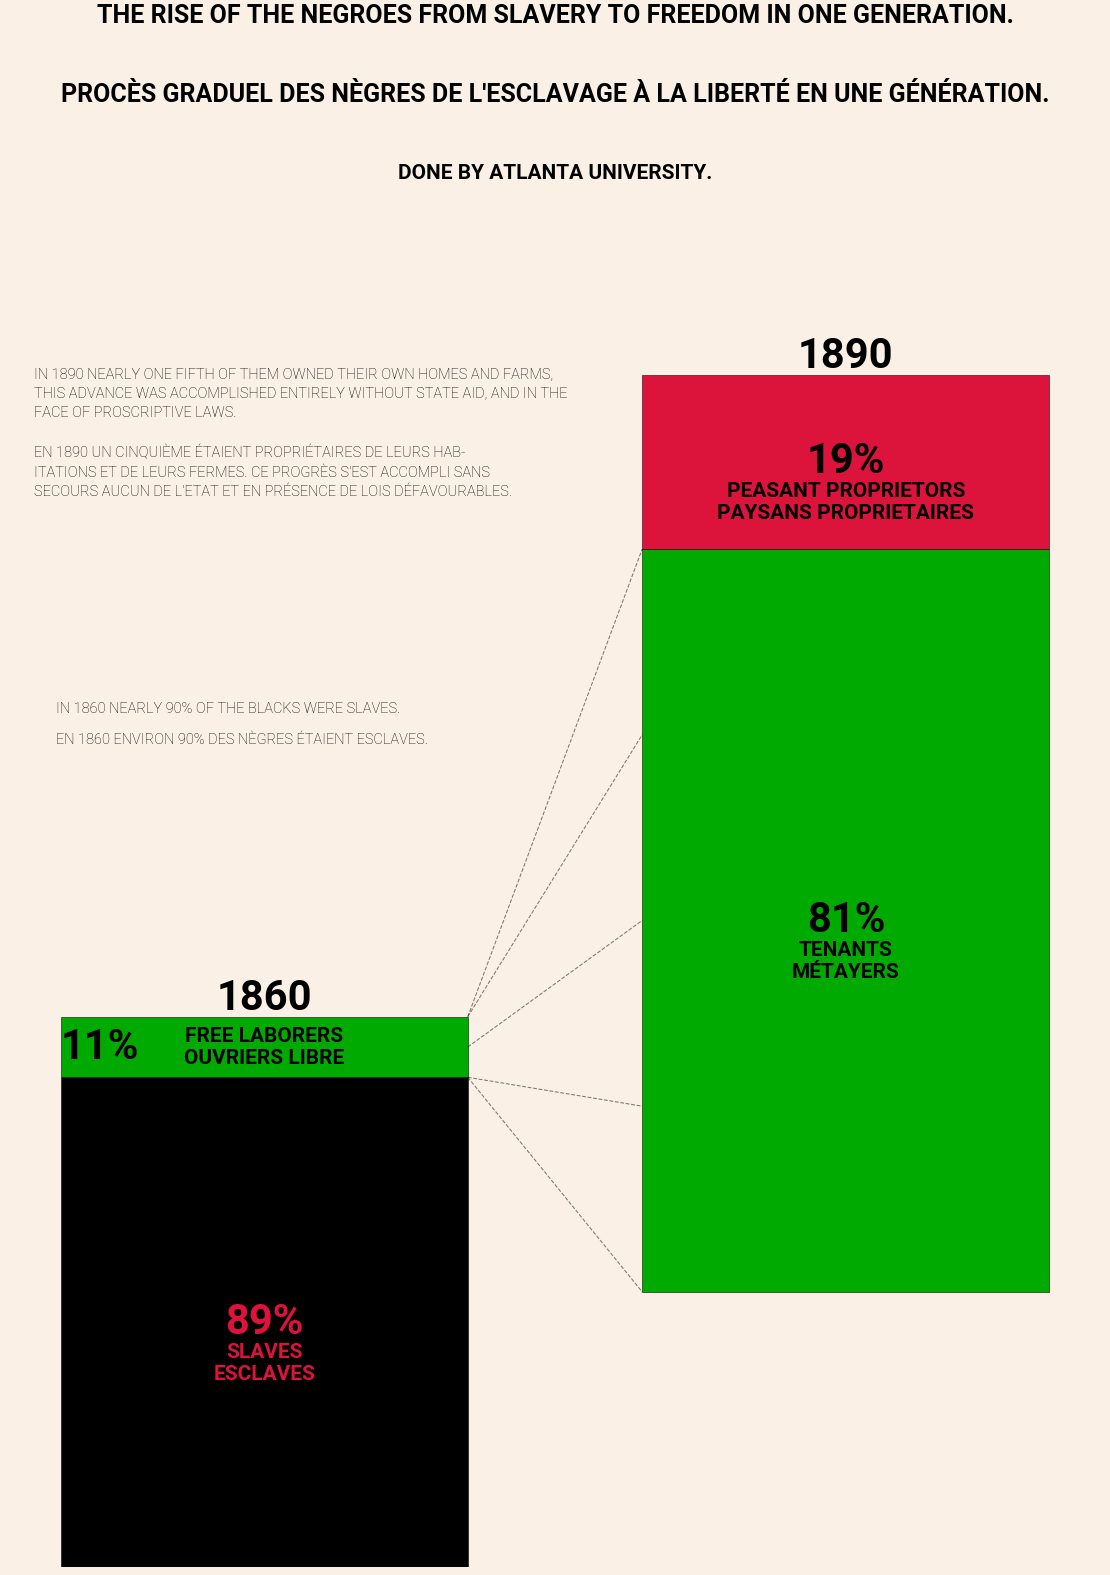

In [183]:
plot_data(
    y1=y1,
    y2=y2,
    y2_projected=y2_projected,
    year_labels=year_labels,
)